In [1]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA 

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler

In [2]:
house_p = pd.read_csv("kc_house_data.csv")

# Droping unnecesry attributes
house_p = house_p.drop(["date","id"], axis = 1)

house_p.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Expanding with new better features
current_year = datetime.datetime.now().year
house_p["home_age"] = current_year - house_p["yr_built"]
house_p['is_renovated'] = house_p["yr_renovated"].where(house_p["yr_renovated"] == 0, 1)

# house_p['total_area'] = house_p['sqft_living'] + house_p['sqft_lot'] + house_p['sqft_above'] + house_p['sqft_basement'] 
# house_p['basement'] = house_p['sqft_basement'].where(house_p["sqft_basement"] == 0, 1)
house_p.drop(['yr_built','yr_renovated'], axis = 1, inplace = True)

(21613, 19)

In [45]:
house_p.shape

(21613, 15)

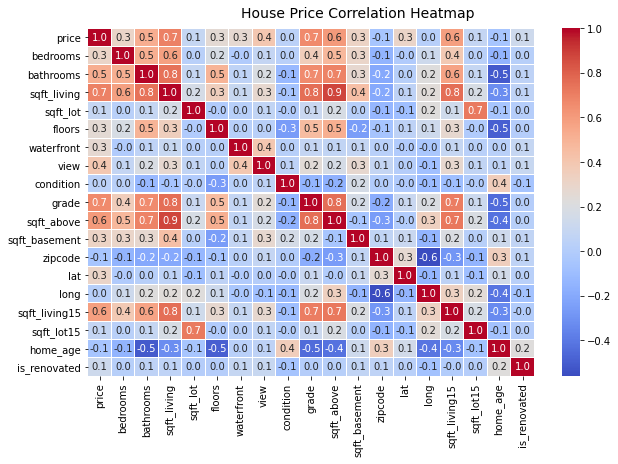

In [5]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = house_p.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('House Price Correlation Heatmap', fontsize=14)

# Removing elements with high corelation

In [47]:
# Create correlation matrix
corr_matrix = house_p.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7 (>0.7 is considered high corelation)
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
house_p.drop(to_drop, axis=1, inplace=True)

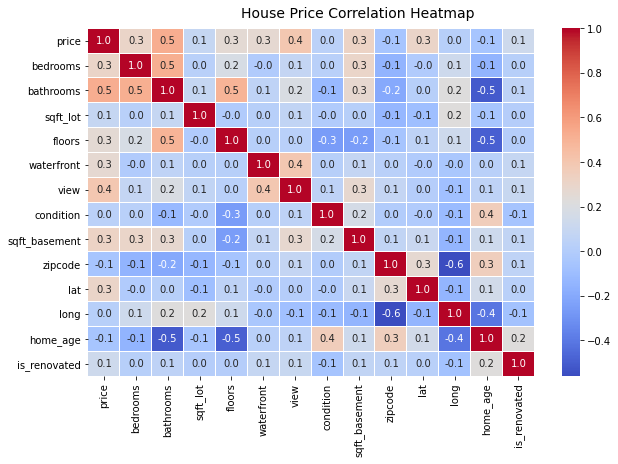

In [48]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = house_p.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('House Price Correlation Heatmap', fontsize=14)

# Clustering using PCA

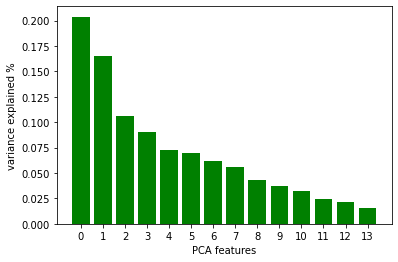

In [49]:
X_std = StandardScaler().fit_transform(house_p)

# Create a PCA instance
pca = PCA(n_components=house_p.shape[1])
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance explained %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

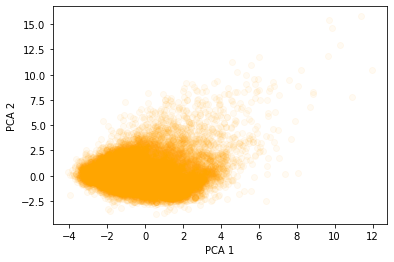

In [50]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.05, color='orange')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

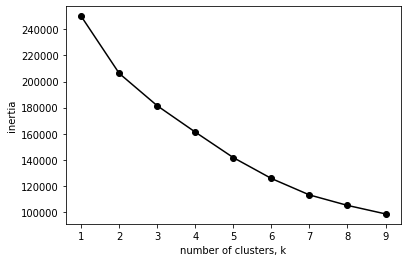

In [51]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:8])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [71]:
p_house_pca = PCA_components.iloc[:,:4]
nClusters = 4

In [72]:
model = KMeans(n_clusters=nClusters)
model.fit(p_house_pca)
labels_predicted = model.predict(p_house_pca)

metrics.silhouette_score(p_house_pca, labels_predicted)

0.31271301599267654

# Clustering without PCA

In [78]:
house_p_norm = StandardScaler().fit_transform(house_p)



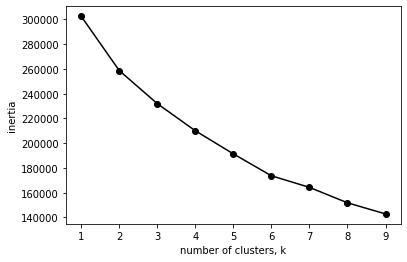

In [79]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(house_p_norm)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [81]:
model = KMeans(n_clusters=7)
model.fit(house_p_norm)
labels_predicted = model.predict(house_p_norm)

metrics.silhouette_score(p_house_pca, labels_predicted)

0.298814693847615